# Predicting Hazardous NEOs (Nearest Earth Objects)

In this project, I will work with a real-world dataset that tracks Nearest Earth Objects (NEOs)
observed by NASA from 1910 to 2024. The dataset contains 338,199 records, each representing
an object in space that has been monitored for its proximity to Earth. Some of these objects are
classified by NASA as "is_hazardous," indicating that they pose a potential danger to our planet.
Your task is to train a machine learning model that can accurately predict whether a NEO is
hazardous or not. This is a critical task, as the ability to accurately identify dangerous objects
could be vital for planetary defense.

### importing needed Packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Data Importing and Cleaning

In [2]:
df = pd.read_csv("nearest-earth-objects(1910-2024).csv")
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [3]:
df.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338171 non-null  int64  
 1   name                    338171 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338171 non-null  object 
 6   relative_velocity       338171 non-null  float64
 7   miss_distance           338171 non-null  float64
 8   is_hazardous            338171 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 23.5+ MB


In [6]:
df.nunique()

neo_id                     33511
name                       33511
absolute_magnitude          1778
estimated_diameter_min      1778
estimated_diameter_max      1778
orbiting_body                  1
relative_velocity         338161
miss_distance             337798
is_hazardous                   2
dtype: int64

In [7]:
#dropping categorical columns
df.drop(columns=['neo_id', 'name', 'orbiting_body'], axis=1, inplace=True)

In [8]:
df.duplicated().sum()

5

### Exploratory Data Analysis (EDA)

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
absolute_magnitude,338171.0,2.293252e+01,2.911216e+00,9.250000,2.074000e+01,2.280000e+01,2.510000e+01,3.358000e+01
estimated_diameter_min,338171.0,1.578120e-01,3.138851e-01,0.000511,2.538370e-02,7.320740e-02,1.890406e-01,3.754525e+01
estimated_diameter_max,338171.0,3.528785e-01,7.018685e-01,0.001143,5.675969e-02,1.636967e-01,4.227075e-01,8.395373e+01
relative_velocity,338171.0,5.106002e+04,2.639992e+04,203.346433,3.071063e+04,4.755705e+04,6.667322e+04,2.917811e+05
miss_distance,338171.0,4.153547e+07,2.077411e+07,6745.532516,2.494495e+07,4.332724e+07,5.933961e+07,7.479865e+07


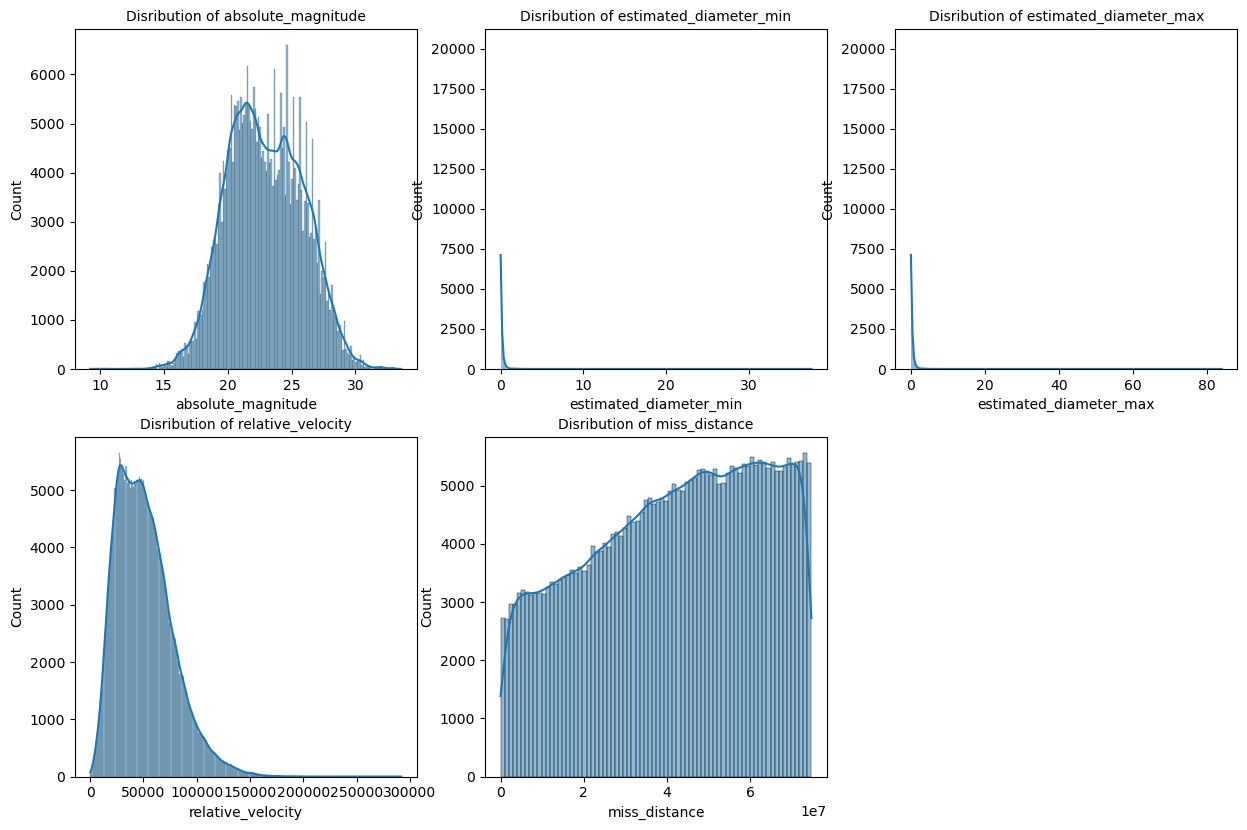

In [10]:
#Distripution of numeric columns
plt.figure(figsize=(15, 15))
numeric_cols = df.select_dtypes(include='number').columns
for i, feature in enumerate(numeric_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Disribution of {feature}', fontsize = 10)
plt.show()

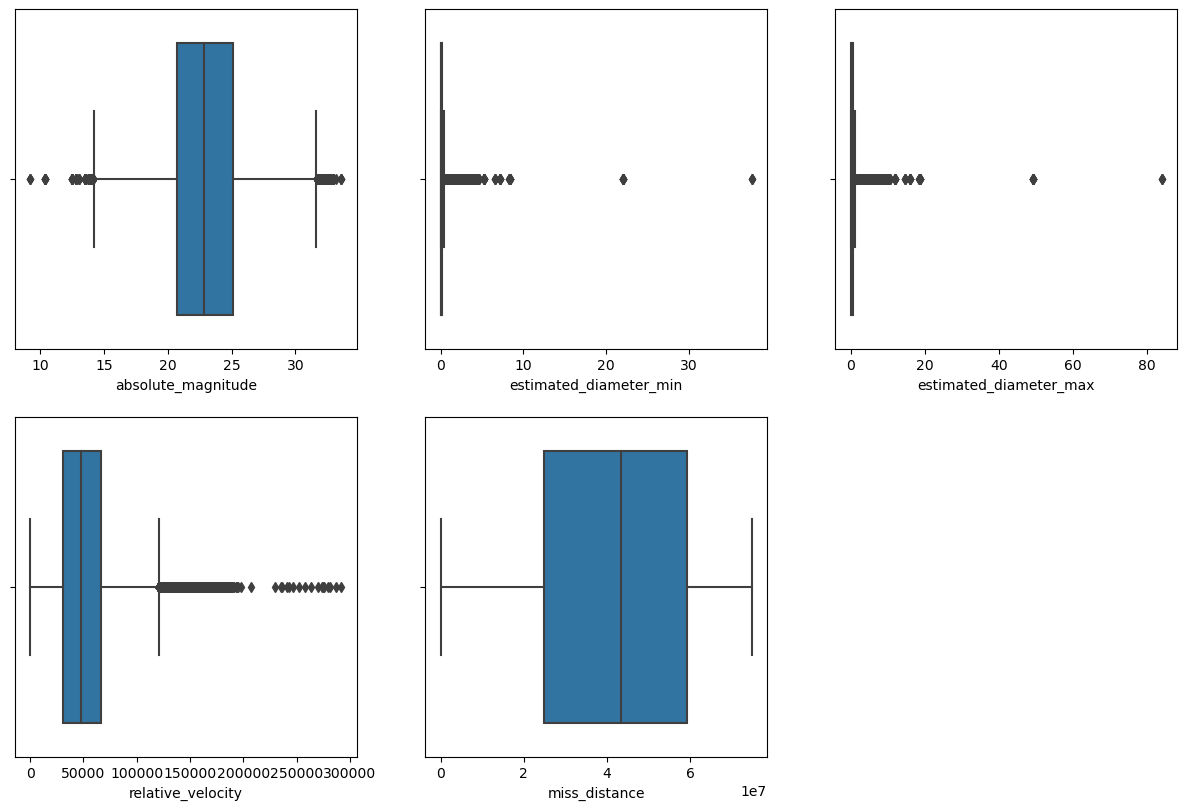

In [11]:
#searching for outliers
plt.figure(figsize=(15, 15))
for i, feature in enumerate(numeric_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[feature])
plt.show()

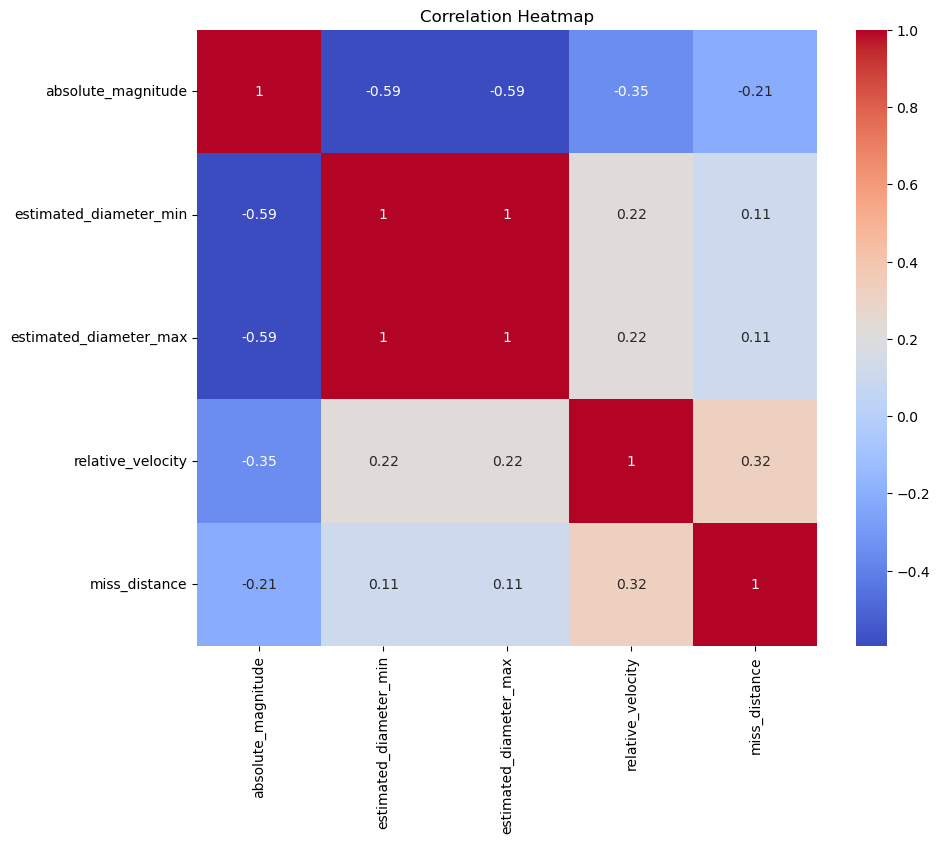

In [12]:
#exploring the correlation between columns
plt.figure(figsize=(10,8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Feature Engineering

In [13]:
#Scaling features
scaler = MinMaxScaler()
for i in numeric_cols:
    df[i] = scaler.fit_transform(df[[i]])
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,0.406494,0.010506,0.010506,0.245362,0.777315,False
1,0.380189,0.014112,0.014112,0.376388,0.745994,True
2,0.501439,0.003617,0.003617,0.084582,0.898495,False
3,0.467735,0.005283,0.005283,0.269865,0.406323,False
4,0.552815,0.002028,0.002028,0.191486,0.843833,False


In [14]:
#Encoding features
encoder = LabelEncoder()
df['is_hazardous'] = encoder.fit_transform(df['is_hazardous'])
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,0.406494,0.010506,0.010506,0.245362,0.777315,0
1,0.380189,0.014112,0.014112,0.376388,0.745994,1
2,0.501439,0.003617,0.003617,0.084582,0.898495,0
3,0.467735,0.005283,0.005283,0.269865,0.406323,0
4,0.552815,0.002028,0.002028,0.191486,0.843833,0


### Building the Model

In [16]:
# spiliting data
X = df.drop(columns=["is_hazardous"])
y = df["is_hazardous"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)

pred = RF_model.predict(x_test)

'              precision    recall  f1-score   support\n\n           0       0.94      0.97      0.95     88613\n           1       0.71      0.58      0.64     12839\n\n    accuracy                           0.92    101452\n   macro avg       0.82      0.77      0.80    101452\nweighted avg       0.91      0.92      0.91    101452\n'

In [18]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     88613
           1       0.71      0.58      0.64     12839

    accuracy                           0.92    101452
   macro avg       0.82      0.77      0.80    101452
weighted avg       0.91      0.92      0.91    101452



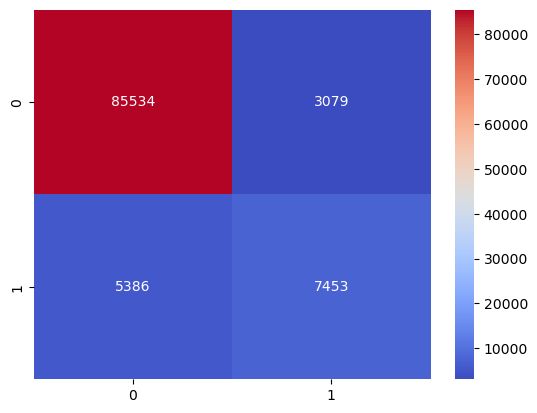

In [20]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt="d",cmap='coolwarm')
plt.xlabel = "Prediction"
plt.ylabel = "Actual"
plt.title = "Confusion Matrix"
plt.show()

In [21]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy is ", accuracy)

Accuracy is  0.9165615266332847
